<a href="https://colab.research.google.com/github/Deepika441/CV/blob/main/road_lane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

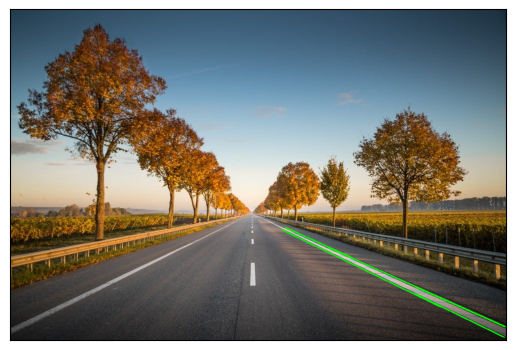

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("road.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_img = cv2.dilate(gray_img, kernel=np.ones((5, 5), np.uint8))
canny = cv2.Canny(gray_img, 100, 200)
roi_vertices = [(270, 670), (600, 400), (1127, 712)]
def roi(image, vertices):
 mask = np.zeros_like(image)
 mask_color = 255
 cv2.fillPoly(mask, vertices, mask_color)
 masked_img = cv2.bitwise_and(image, mask)
 return masked_img
roi_image = roi(canny, np.array([roi_vertices], np.int32))
def draw_lines(image, hough_lines):
  if hough_lines is not None:
    for line in lines:
      x1, y1, x2, y2 = line[0]
      cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
  return image
lines = cv2.HoughLinesP(roi_image, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)
final_img = draw_lines(img, lines)
plt.imshow(final_img)
plt.xticks([])
plt.yticks([])
plt.show()
